x1 mean     9.0 stdev   3.162
x2 mean     9.0 stdev   3.162
x3 mean     9.0 stdev   3.162
x4 mean     9.0 stdev   3.162
y1 mean   7.501 stdev   1.937
y2 mean   7.501 stdev   1.937
y3 mean     7.5 stdev   1.936
y4 mean   7.501 stdev   1.936


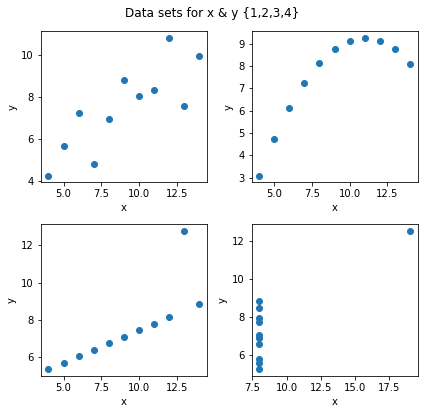

In [59]:
%matplotlib inline
import numpy as npy
import matplotlib.pyplot as plt
import scipy.io as sio

AQ = sio.loadmat('AQ.mat')

fig, ax = plt.subplots(2,2,figsize=(6,6))

def meanSD(x):
    
    #Calculate Mean of array
    mean = sum(x)/len(x)
    
    #Calculate SD of array
    sd = 0.
    for v in x:
        sd += (v-mean)**2   
    sd = (sd/len(x))**0.5
    
    return mean, sd

for v in ['x1','x2','x3','x4','y1','y2','y3','y4']:
    m,s = meanSD(AQ[v][0])
    print("{} mean {:7.4} stdev {:7.4}".format(v,m,s))

i=1
for ax in fig.get_axes():
    x = AQ['x'+str(i)]
    y = AQ['y'+str(i)]
    ax.plot(x[0],y[0], marker='o', linestyle='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    i += 1
    
fig.suptitle('Data sets for x & y {1,2,3,4}')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

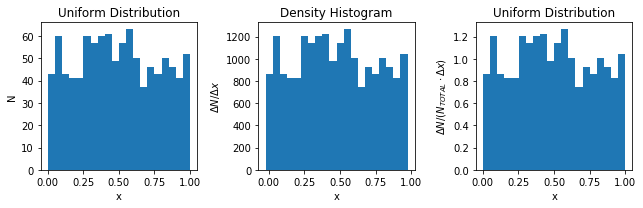

In [50]:
fig, axs = plt.subplots(1,3,figsize=(9,3))

ndata = 1000
N = 20
data = npy.random.rand(ndata)

# Freq Diagram
p = plt.subplot(1,3,1)
p.set_xlabel("x")
p.set_ylabel("N")
n, bins, patches = p.hist(data,N)
p.set_title("Uniform Distribution")

#Density Diagram
p = plt.subplot(1,3,2)
p.set_xlabel("x")
p.set_ylabel(r'$ \Delta N /  \Delta x$')
binwidth = bins[1]-bins[0]
p.bar(bins[:-1], n/binwidth, width=binwidth)
p.set_title("Density Histogram")

# Normalised Diagram
p = plt.subplot(1,3,3)
p.set_xlabel("x")
p.set_ylabel(r'$ \Delta N /  (N_{TOTAL} \cdot \Delta x)$')
n, bins, patches = p.hist(data,N,density=True)
p.set_title("Uniform Distribution")

fig.tight_layout()
plt.show()